In [178]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [ ]:
!head adult.data

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [179]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [180]:
df = pd.read_csv('adult.data', sep=',', skipinitialspace=True, names=cols)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Сколько мужчин и женщин?

In [6]:
df.groupby('sex').sex.count()

sex
Female    10771
Male      21790
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [7]:
df.groupby('sex').age.mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [10]:
df_perc = df.groupby('native-country')['native-country'].count()
df_perc['United-States'] / df_perc.sum() * 100

89.5857006848684

In [16]:
us_count = df.loc[df['native-country'] == 'United-States', 'native-country'].count()
us_count / df['native-country'].count() * 100

89.5857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

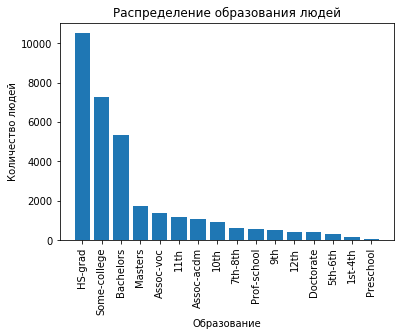

In [90]:
df_educ = df['education'].value_counts()
plt.bar(df_educ.index, df_educ.values, tick_label=df_educ.index)
plt.xticks(rotation='vertical')
plt.title('Распределение образования людей')
plt.xlabel('Образование')
plt.ylabel('Количество людей');

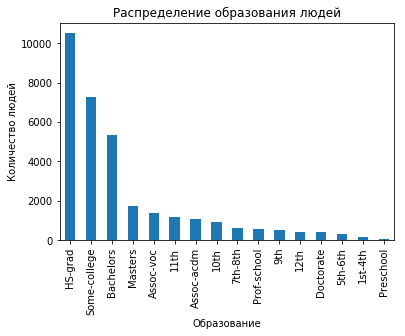

In [4]:
df_educ = df['education'].value_counts()
plot_bar = df_educ.plot.bar()
plot_bar.set_title('Распределение образования людей')
plot_bar.set_xlabel('Образование')
plot_bar.set_ylabel('Количество людей');

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [35]:
# divorced
divorced = df['marital-status']=='Divorced'

print(df[divorced].fnlwgt.mean())
print(df[divorced].fnlwgt.std())

185802.79045689848
105646.78945933598


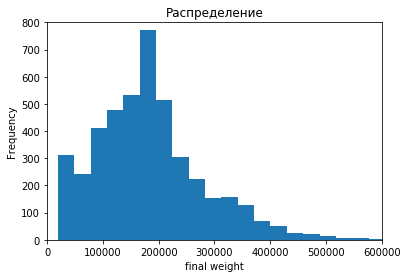

In [71]:
df_hist = df[divorced].fnlwgt
plot_hist = df_hist.plot.hist(bins=50)
plot_hist.axis([0, 600000, 0, 800])
plot_hist.set_xlabel('final weight')
plot_hist.set_ylabel('Frequency')
plot_hist.set_title('Распределение');

> Ответ: оно мне напоминает распределение Пуассона

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [98]:
# df.result.value_counts()
df_educ = df.loc[df['result'] == '>50K', 'education'].value_counts()
graduated = df_educ['Bachelors'] + df_educ['Masters'] + df_educ['Doctorate']

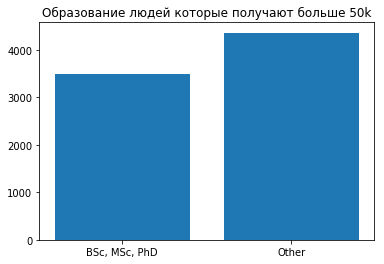

In [111]:
plt.bar(['BSc, MSc, PhD', 'Other'], [graduated, df_educ.sum() - graduated])
plt.title('Образование людей которые получают больше 50k');

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [132]:
df.groupby('education')['hours-per-week'].mean()

education
10th            37.052519
11th            33.925957
12th            35.780600
1st-4th         38.255952
5th-6th         38.897898
7th-8th         39.366873
9th             38.044747
Assoc-acdm      40.504217
Assoc-voc       41.610709
Bachelors       42.614006
Doctorate       46.973366
HS-grad         40.575374
Masters         43.836332
Preschool       36.647059
Prof-school     47.425347
Some-college    38.852284
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [133]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

Ответ: мужчины.

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [189]:
not_related = df.relationship.isin(['Not-in-family', 'Unmarried'])
print(f"Не в отношениях - {df[not_related]['hours-per-week'].mean()}")
print(f"В отношениях - {df[~not_related]['hours-per-week'].mean()}")

Не в отношениях - 40.157944004765554
В отношениях - 40.595290725612685


Ответ: те кто в отношениях работают больше.

# Из каких стран люди работают farmers/fishers?

In [205]:
farm_fish = df.occupation=='Farming-fishing'
df[farm_fish]['native-country'].value_counts().index

Index(['United-States', 'Mexico', '?', 'Puerto-Rico', 'Guatemala',
       'Philippines', 'Italy', 'El-Salvador', 'Canada', 'Vietnam', 'Cuba',
       'Cambodia', 'Yugoslavia', 'Hong', 'Germany', 'Portugal', 'England',
       'Ireland', 'Poland', 'France', 'Japan'],
      dtype='object')

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [229]:
max_work_time = df['hours-per-week'].max()
max_work = df['hours-per-week']==max_work_time

print(f"Максимум работы в неделю - {max_work_time}")
print(f"Так много работает - {df[max_work].result.count()} людей")
print(f"Их доход:\n{df[max_work]['capital-gain'].to_string()}")

Максимум работы в неделю - 99
Так много работает - 85 людей
Их доход:
935          0
1172         0
1887         0
3578         0
4086         0
4308         0
4441         0
5376         0
5432      2354
6618         0
6898         0
8072         0
8393         0
8654         0
8796     15024
9811         0
9831         0
10143        0
10266        0
10468        0
10986        0
11833        0
12209        0
12625        0
12788        0
13558        0
13580        0
13617     4416
13858        0
14593        0
15016        0
15180        0
15356        0
15460        0
15534        0
16604     6418
16868     2407
16992        0
17611        0
18603        0
18881        0
19053        0
19141        0
19399        0
19529        0
19731        0
19997        0
20036        0
21056        0
21147        0
22216        0
22313        0
22557        0
22720        0
23179     2907
23226        0
23398        0
23649    15024
23830        0
24483        0
25354        0
25713        0
